# Data Science and Business Analytics Internship-Dec20
#### GRIP @ The Sparks Foundation
###  Perform ‘Exploratory Data Analysis’ on dataset  ‘Global Terrorism’ 
### Task-4 : Exploratory Data Analysis - Terrorism 
### Author: Abu Bakkar Siddikk
##### Batch: December-2020

In [8]:
# Importing Neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [11]:
# To Load Dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

In [12]:
# To read first five rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [18]:
# To Rename futures name
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [19]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
# To see Shape of the Dataset
df.shape

(181691, 135)

In [17]:
# to check is null value Available
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [20]:
# Selected only neccessary feature data
df = df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [21]:
# to see the first selected five rows
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [22]:
# to check again is null value Available
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [23]:
# To check the informaiont of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [25]:
# drop Null values
df.dropna(inplace=True)

In [26]:
# after drop the null value the shape is
df.shape

(46556, 19)

In [66]:
city =  df.city.value_counts().index[0]
print(f"City wish most Attack: {city}")

City wish most Attack: Baghdad


In [59]:
mostattack = df.AttackType.value_counts().idxmax()
mostattack = mostattack.replace('/',' ')
print(f"Type of most Attack Name: {mostattack}")

Type of most Attack Name: Bombing Explosion


In [67]:
country = df.Country.value_counts().idxmax()
print(f"Country wish most Attack: {country}")

Country wish most Attack: Iraq


In [68]:
region = df.Region.value_counts().idxmax()
print(f"Region wish most Attack: {region}")

Region wish most Attack: South Asia


In [69]:
Year = df.Year.value_counts().idxmax()
print(f"Year wish most Attack: {Year}")

Year wish most Attack: 2011


In [70]:
Month = df.Month.value_counts().idxmax()
print(f"Month wish most Attack: {Month}")

Month wish most Attack: 7


In [71]:
Group = df.Group.value_counts().index[1]
print(f"Group wish most Attack: {Group}")

Group wish most Attack: Taliban


<AxesSubplot:xlabel='Country,AttackType'>

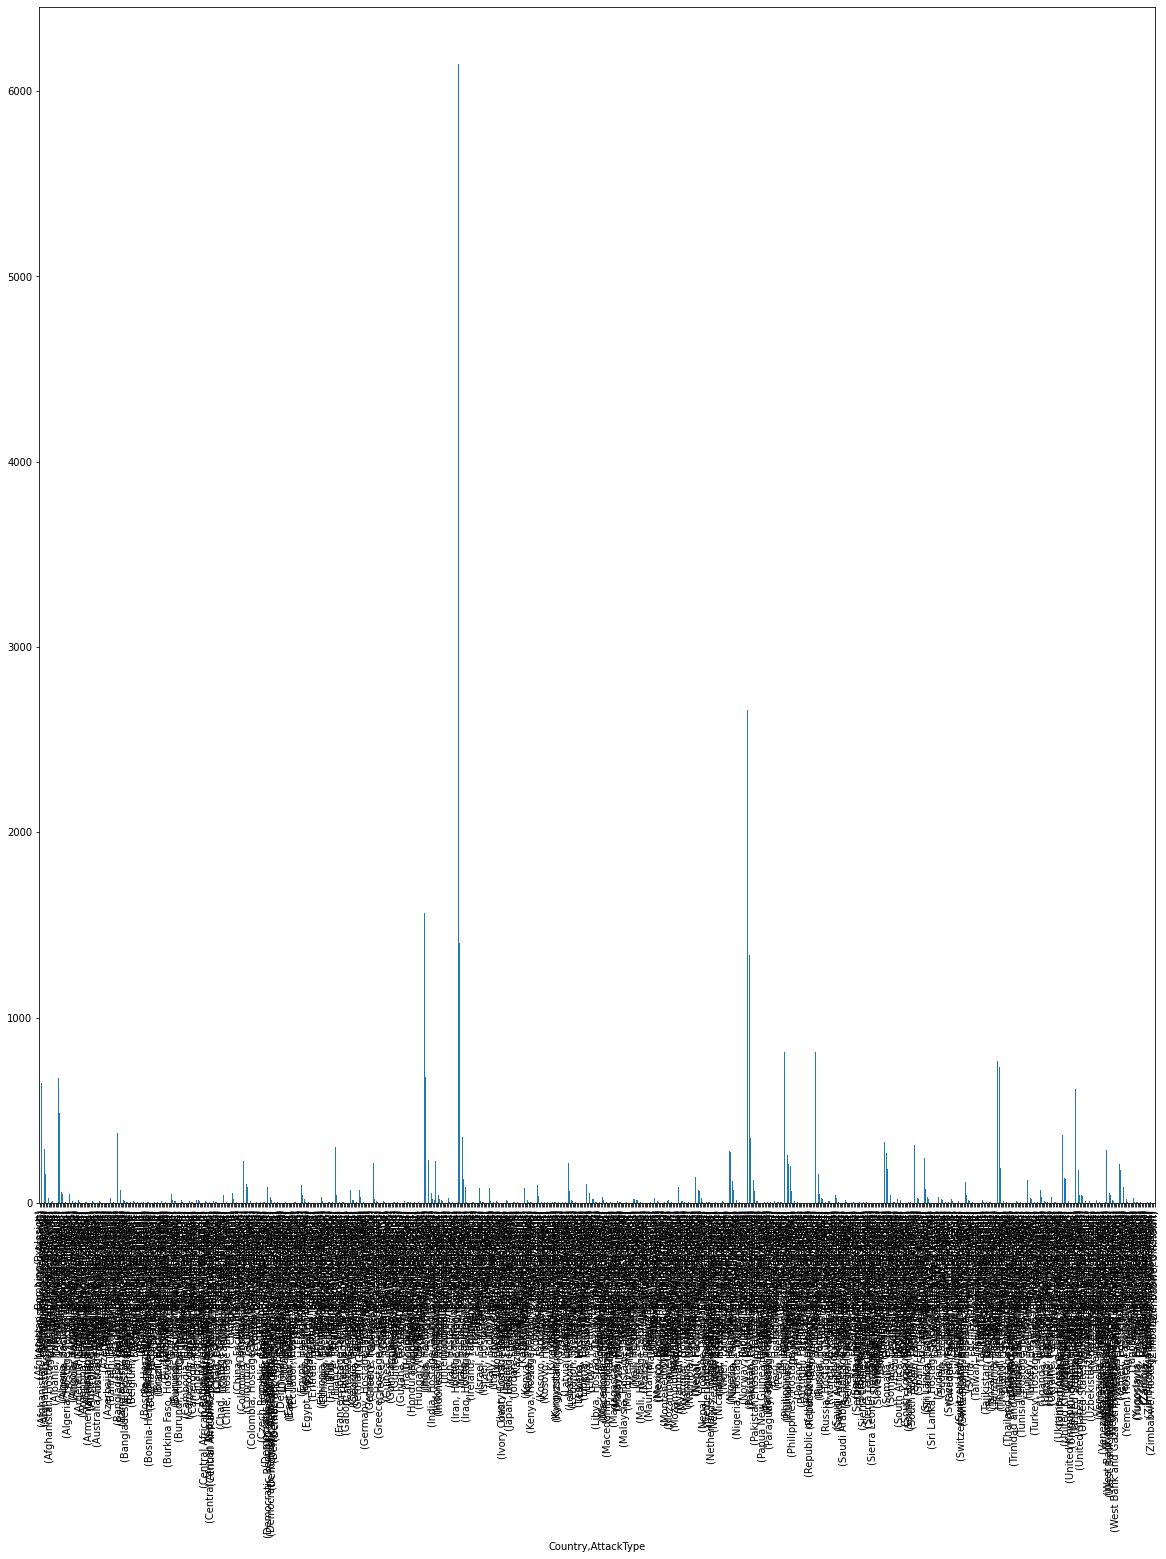

In [106]:
plt.figure(figsize=(20,22))
df.groupby('Country')['AttackType'].value_counts().plot.bar()

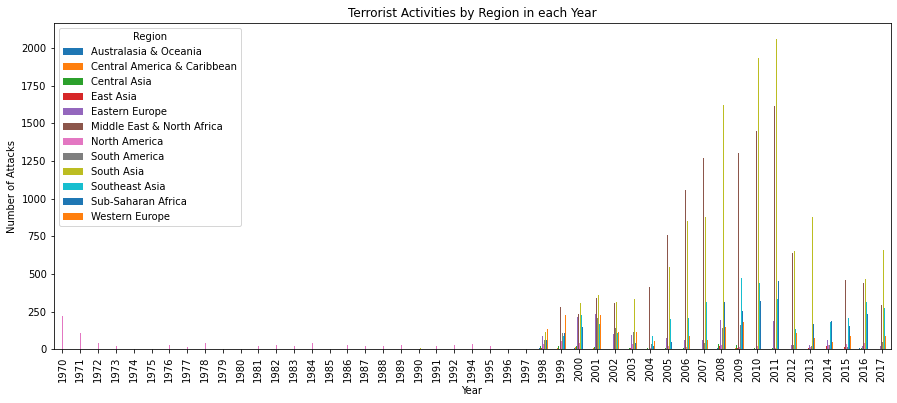

In [107]:
pd.crosstab(df.Year, df.Region).plot(kind='bar',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

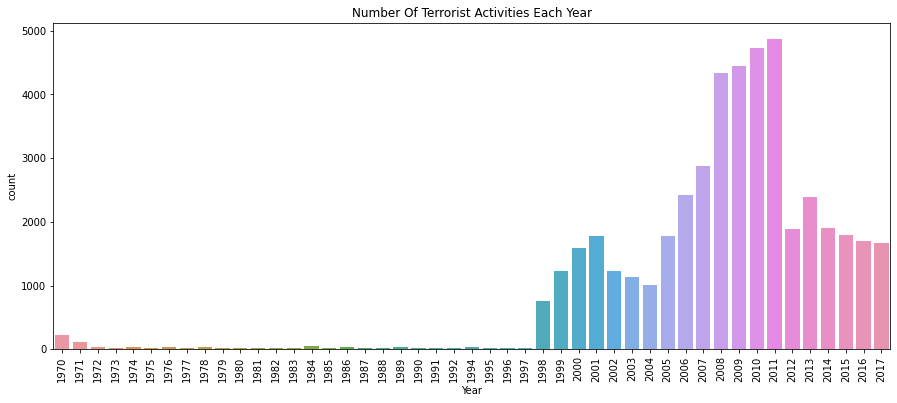

In [108]:
# To see the number of Terrorist activities each Year
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

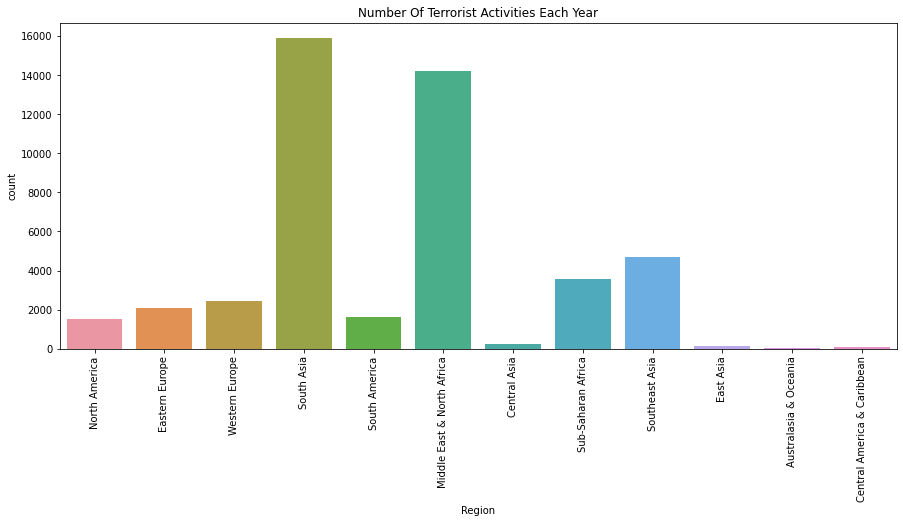

In [109]:
# To see the number of Terrorist activities each Region
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

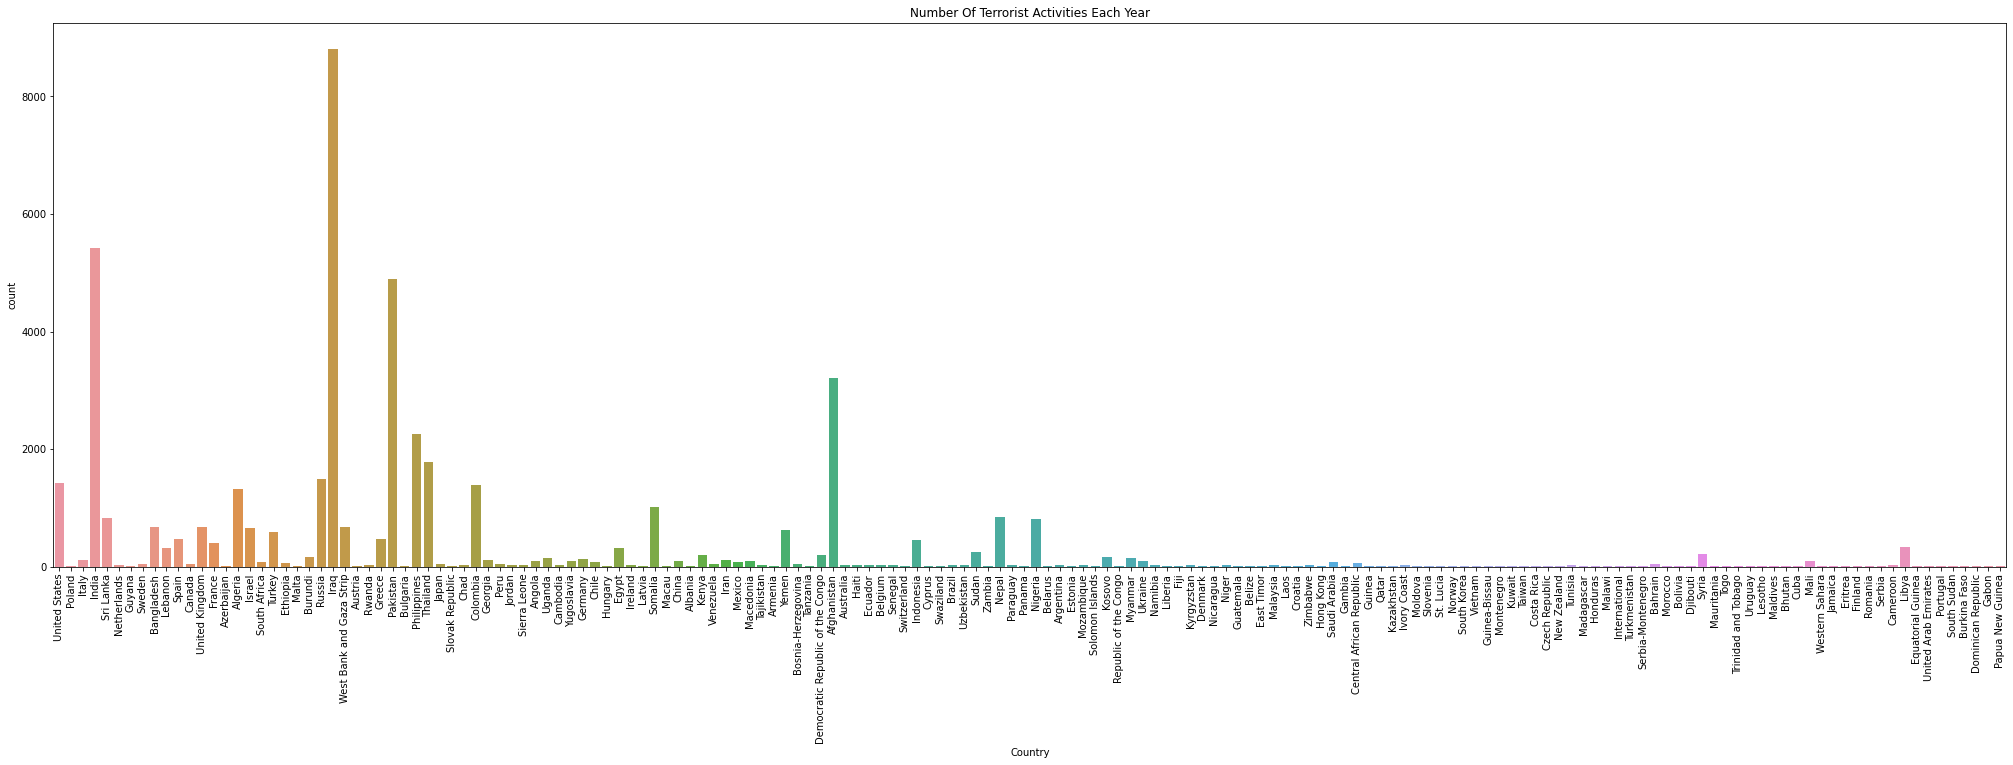

In [115]:
# To see the number of Terrorist activities each Year
plt.subplots(figsize=(35,10))
sns.countplot('Country',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

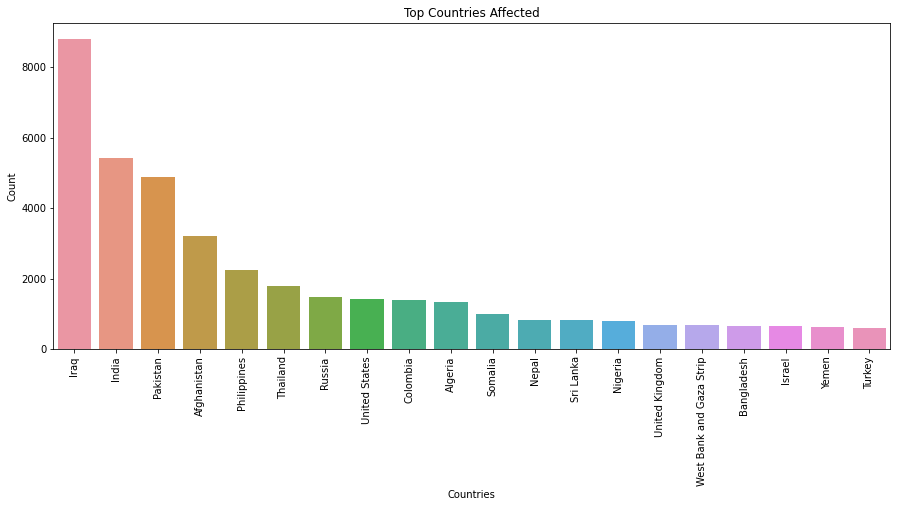

In [117]:
# To See the Top Countries affected by Terrorist Attacks
x = df['Country'].value_counts()[:20].index
y = df['Country'].value_counts()[:20].values
plt.subplots(figsize=(15,6))
sns.barplot(x, y)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [121]:
# Most weapon use by terrorist
df['Weapon_type'].value_counts() 

Explosives                                                                     24712
Firearms                                                                       14073
Incendiary                                                                      3519
Unknown                                                                         2656
Melee                                                                           1242
Chemical                                                                         121
Sabotage Equipment                                                                79
Other                                                                             64
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       44
Biological                                                                        23
Fake Weapons                                                                      13
Radiological                                                     

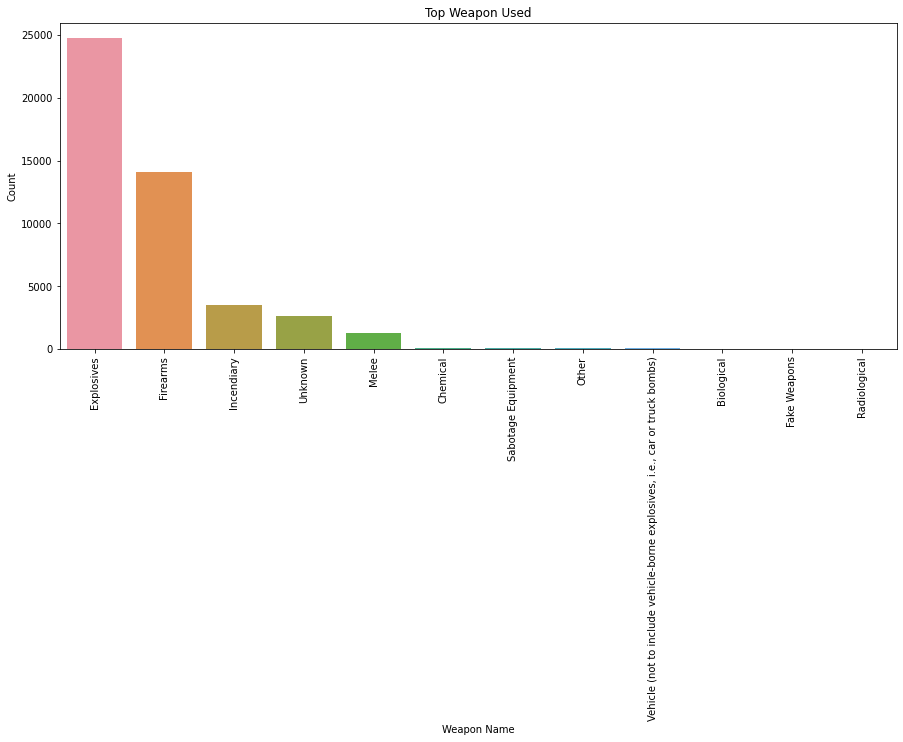

In [122]:
x = df['Weapon_type'].value_counts() .index
y = df['Weapon_type'].value_counts() .values
plt.subplots(figsize=(15,6))
sns.barplot(x, y)
plt.title('Top Weapon Used')
plt.xlabel('Weapon Name')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

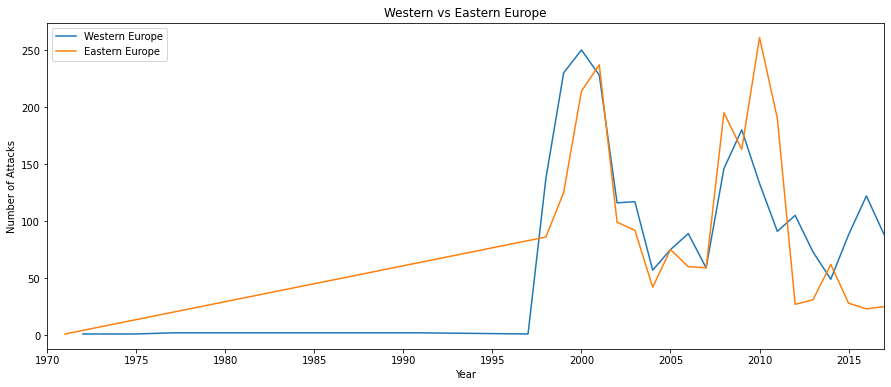

In [123]:
fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

#  Thank You All